In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
data_set=pd.read_csv("C:\\Users\\TUF DASH\\Documents\\Time_Series_Analysis\\monthly-car-sales.csv")

In [2]:
data_set

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


In [3]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   108 non-null    object
 1   Sales   108 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [4]:
data_set['Month']=pd.to_datetime(data_set['Month'])

In [5]:
data_set.index=data_set['Month']

In [6]:
data_set.drop(columns='Month',inplace=True)

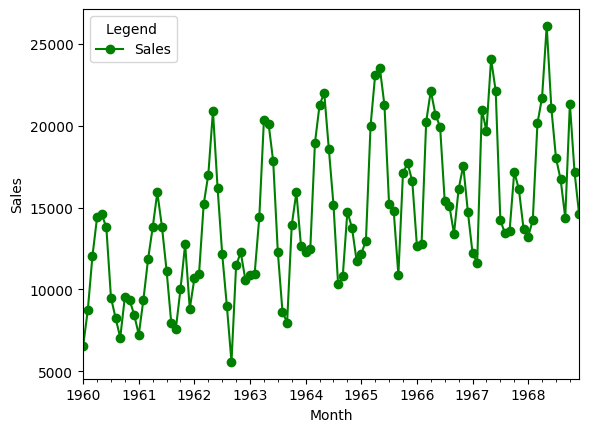

In [7]:
import matplotlib.pyplot as plt  # Import matplotlib.pyplot

data_set.plot(color='green',marker='o')
plt.legend(title='Legend ')
plt.xlabel('Month')
plt.ylabel('Sales')



plt.show()


In [8]:
#test if the series is stationary or not (specifically test the trend with augmented Dicckey Filler Test)
from statsmodels.tsa.stattools import adfuller
def adfuller_summary(time_series):
    result = adfuller(time_series)
    summary = {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Number of Lags Used': result[2],
        'Number of Observations Used': result[3],
        'Critical Values': result[4],
        'Conclusion': 'Stationary' if result[1] <= 0.05 else 'Non-Stationary'
    }
    return summary
adfuller_summary(data_set['Sales'])

{'ADF Statistic': np.float64(-1.2238127661752833),
 'p-value': np.float64(0.6632691049832871),
 'Number of Lags Used': 12,
 'Number of Observations Used': 95,
 'Critical Values': {'1%': np.float64(-3.5011373281819504),
  '5%': np.float64(-2.8924800524857854),
  '10%': np.float64(-2.5832749307479226)},
 'Conclusion': 'Non-Stationary'}

In [9]:

# Assuming you have a dataset to apply the test on
import sys
print(sys.executable)

C:\Users\TUF DASH\AppData\Local\Programs\Python\Python312\python.exe


In [10]:
data_set=data_set.diff()
data_set.dropna()

,Sales
Month,
1960-02-01,2178.0
1960-03-01,3298.0
1960-04-01,2369.0
1960-05-01,192.0
1960-06-01,-796.0
...,...
1968-08-01,-1302.0
1968-09-01,-2337.0
1968-10-01,6957.0


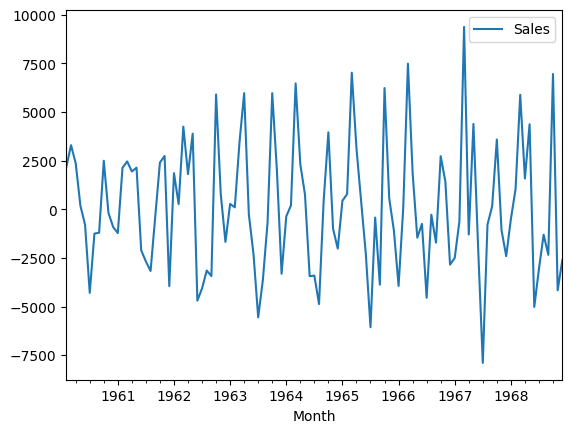

In [21]:
data_set.dropna(inplace=True)
data_set.plot()
plt.show()

In [22]:
def adfuller_summary(time_series):
    result = adfuller(time_series)
    summary = {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Number of Lags Used': result[2],
        'Number of Observations Used': result[3],
        'Critical Values': result[4],
        'Conclusion': 'Stationary' if result[1] <= 0.05 else 'Non-Stationary'
    }
    return summary
adfuller_summary(data_set['Sales'])


{'ADF Statistic': np.float64(-6.199799230800689),
 'p-value': np.float64(5.8447525992770054e-08),
 'Number of Lags Used': 11,
 'Number of Observations Used': 95,
 'Critical Values': {'1%': np.float64(-3.5011373281819504),
  '5%': np.float64(-2.8924800524857854),
  '10%': np.float64(-2.5832749307479226)},
 'Conclusion': 'Stationary'}

In [23]:
data_set

,Sales
Month,
1960-02-01,2178.0
1960-03-01,3298.0
1960-04-01,2369.0
1960-05-01,192.0
1960-06-01,-796.0
...,...
1968-08-01,-1302.0
1968-09-01,-2337.0
1968-10-01,6957.0


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_set, lags=20) 